In [1]:
import numpy as np
from qiskit import(
  QuantumCircuit,
  execute,
  Aer)
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_bloch_multivector

In [2]:
# Use Aer's qasm_simulator
simulator1 = Aer.get_backend('qasm_simulator')
simulator2 = Aer.get_backend('statevector_simulator')

### Aer Simulators

**QasmSimulator**: Allows ideal and noisy multi-shot execution of qiskit
circuits and returns counts or memory.

**UnitarySimulator**: Allows ideal single-shot execution of qiskit
circuits and returns the final unitary matrix of the circuit itself.

**StatevectorSimulator**: Allows ideal single-shot execution of qiskit
circuits and returns the final statevector of the simulator after 
application.

In [3]:
# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(2, 2)

In [4]:
# Add a H gate on qubit 0
circuit.h(0)

In [5]:
%%latex
$H = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$

<IPython.core.display.Latex object>

In [6]:
#This puts the qubit 0 into a superposition state.
#|ψ⟩=(|00⟩+|11⟩)/√2
# Its qbit 1 then H puts it to |ψ⟩=(|00⟩ - |11⟩)/√2

In [7]:
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)
#A controlled-Not operation (CX) on control qubit 0 and target qubit 1,
#putting the qubits in an entangled state.

In [8]:
# Map the quantum measurement to the classical bits
# Syntax: circuit.measure(qubit, cbit)
circuit.measure([0,1], [0,1])
# if you pass the entire quantum and classical registers to measure,
#the ith qubit’s measurement result will be stored in the ith classical bit.

In [9]:
# Execute the circuit on the qasm simulator for 1000 times
job1 = execute(circuit, simulator1, shots=1000)

In [10]:
# Grab results from the job
result1 = job1.result()

In [11]:
# Returns counts
counts = result1.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)

# Draw the circuit
circuit.draw()


Total count for 00 and 11 are: {'00': 501, '11': 499}


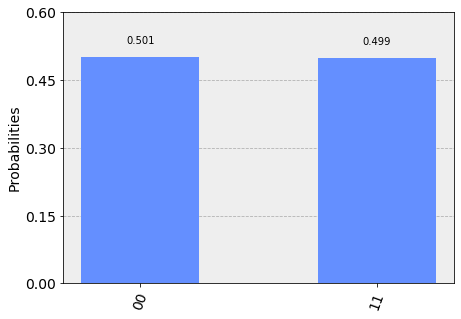

In [12]:
# Plot a histogram
plot_histogram(counts)

In [13]:
# Find the output state of above transformation
job2 = execute(circuit, simulator2)
result2=job2.result()
outputstate = result2.get_statevector(circuit, decimals=3)
print(outputstate)

[0.+0.j 0.+0.j 0.+0.j 1.+0.j]


In [14]:
# Ok! Let's grab a pen and paper and see if this answer is correct!


In [15]:
#Checking how C-NOT works by itself!
circuit = QuantumCircuit(2, 2)
circuit.cx(0, 1)
circuit.measure([0,1], [0,1])
job1 = execute(circuit, simulator1, shots=1000)
result3 = job1.result()
counts = result3.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)
# Draw the circuit
circuit.draw()


Total count for 00 and 11 are: {'00': 1000}


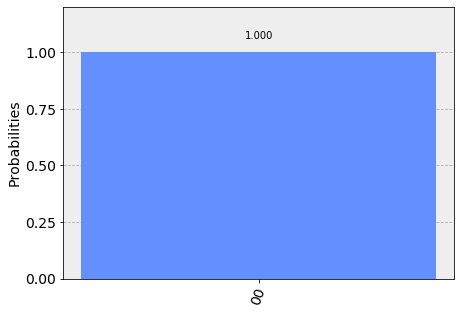

In [16]:
# Plot a histogram
plot_histogram(counts)

In [17]:
# Looks like NOT gate does not do anything. 
# What if |01> ?
#Turns out C-NOT gate is not the classical NOT Gate.
# The controlled NOT gate (or CNOT or cX) acts on 2 qubits,
#and performs the NOT operation on the second qubit only when the first
#qubit is |1> otherwise leaves it unchanged.
# Upon gooling Pauli-X gate is NOT gate.
# Lets apply Pauli_X gate 2nd bit and the do C-NOT!


In [18]:
%%latex
$X|0>=\begin{bmatrix} 0 & 1\\ 1 & 0 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \end{bmatrix} = |1>$

<IPython.core.display.Latex object>

In [19]:
#Checking how C-NOT works by itself!
circuit = QuantumCircuit(2, 2)
circuit.x(1) # Using Pauli-X gate to flip 2nd Bit!
circuit.cx(0, 1)
circuit.measure([0,1], [0,1])
job1 = execute(circuit, simulator1, shots=1000)
result4 = job1.result()
counts = result4.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)
# Draw the circuit
circuit.draw()


Total count for 00 and 11 are: {'10': 1000}


In [20]:
# It worked ! |01> flipped to |10>.

In [21]:
#OK! Now let's see Pauli Y and Z- gate!

In [2]:
%%latex
$Y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix} \quad\quad\quad\quad Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}$ 
\\
$Y = i|0\rangle\langle1| - i|1\rangle\langle0| \quad\quad Z = |0\rangle\langle0| - |1\rangle\langle1|$ \\


And, unsurprisingly, they also respectively perform rotations by
π  around the y and z-axis of the Bloch sphere.

<IPython.core.display.Latex object>

In [23]:
circuitn = QuantumCircuit(1, 1)
circuitn.y(0)
circuitn.measure([0], [0])
job5 = execute(circuitn, simulator2).result().get_statevector()
# Draw the circuit
circuitn.draw()

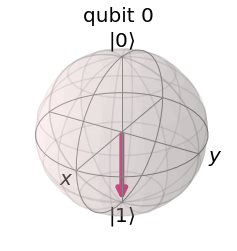

In [24]:
plot_bloch_multivector(job5)